In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj, transform

plt.rcParams['font.family'] = 'Malgun Gothic'

In [30]:
#숙박 유형
pension=pd.read_excel("./숙박유형_관광펜션업.xlsx")
camping=pd.read_excel("./숙박유형_일반야영장업.xlsx")
hanok=pd.read_excel("./숙박유형_한옥체험업.xlsx")
resort=pd.read_excel("./숙박유형_호텔리조트.xlsx") 

In [37]:
#콘텐츠
rural=pd.read_excel('./콘텐츠_농어촌숙박.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   소재지면적       3172 non-null   float64
 1   소재지전체주소     2739 non-null   object 
 2   도로명전체주소     3395 non-null   object 
 3   도로명우편번호     3380 non-null   float64
 4   좌표정보(X)     3289 non-null   float64
 5   좌표정보(Y)     3289 non-null   float64
 6   용도지역        2813 non-null   object 
 7   객실수         3395 non-null   int64  
 8   주택면적        3395 non-null   float64
 9   방면적비율       3395 non-null   float64
 10  소화기개수       3395 non-null   int64  
 11  단독경보형감지기개수  3395 non-null   int64  
 12  자동확산소화기대수   3395 non-null   int64  
 13  휴대용비상조명등대수  3395 non-null   int64  
 14  피난구유도등개수    3395 non-null   int64  
 15  유도표지개수      3395 non-null   int64  
 16  완강기대수       3395 non-null   int64  
 17  가스누설경보기대수   3395 non-null   int64  
 18  일산화탄소감지기대수  3395 non-null   int64  
 19  오수처리시설용량    3395 non-null  

In [40]:
restuarant=pd.read_csv('./부대시설_음식점.csv',encoding='cp949')
restuarant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   항목          22 non-null     object 
 1   단위 (개)      22 non-null     object 
 2   경도          22 non-null     float64
 3   위도          22 non-null     float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 1.2+ KB


In [31]:
pension.drop(pension[(pension['영업상태구분코드']!=1)].index,inplace=True)
camping.drop(camping[(camping['영업상태구분코드']!=1)].index,inplace=True)
hanok.drop(hanok[(hanok['영업상태구분코드']!=1)].index,inplace=True)
resort.drop(resort[(resort['영업상태구분코드']!=1)].index,inplace=True)
#1: 영업/정상

In [32]:
pension=pension[pension['개방자치단체코드'].between(4800000,5100000)]
camping=camping[camping['개방자치단체코드'].between(4800000,5100000)]
hanok=hanok[hanok['개방자치단체코드'].between(4800000,5100000)]
resort=resort[resort['개방자치단체코드'].between(4800000,5100000)]

In [33]:
ps=pension.loc[:,['좌표정보(X)','좌표정보(Y)']]
cp=camping.loc[:,['좌표정보(X)','좌표정보(Y)']]
hk=hanok.loc[:,['좌표정보(X)','좌표정보(Y)']]
rs=resort.loc[:,['좌표정보(X)','좌표정보(Y)']]

In [34]:
proj_1 = Proj(init='epsg:2097')
proj_2 = Proj(init='epsg:4326')

accomm=[ps,cp,hk,rs]

for acco in accomm:
    convert = transform(proj_1, proj_2, acco['좌표정보(X)'].values, acco['좌표정보(Y)'].values)
    acco['경도'] = convert[0]
    acco['위도'] = convert[1]
    acco=acco.loc[:,['위도','경도']]
    
ps.info()
cp.info()
hk.info()
rs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 548 to 753
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   좌표정보(X)  147 non-null    float64
 1   좌표정보(Y)  147 non-null    float64
 2   경도       147 non-null    float64
 3   위도       147 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 2553 to 2971
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   좌표정보(X)  306 non-null    float64
 1   좌표정보(Y)  306 non-null    float64
 2   경도       306 non-null    float64
 3   위도       306 non-null    float64
dtypes: float64(4)
memory usage: 12.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 1089 to 2066
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   좌표정보(X)  791 non-null    float64
 1   좌표정보(Y)  791 non-null    float64
 2  

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\user\AppData\Local\Temp\ipykernel_198036\4275688461.py:7: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotcha

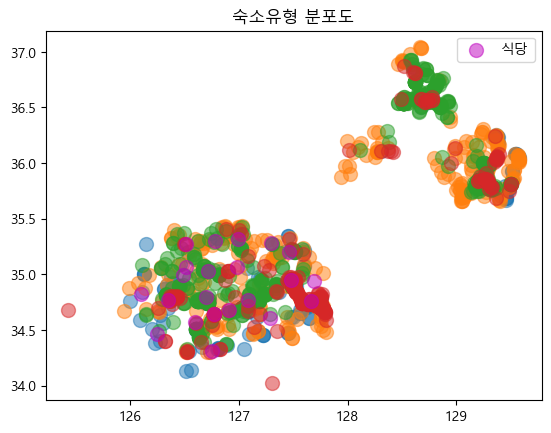

125.2213382593913 129.78613476845788 33.86897650586153 37.19027700829823


In [41]:
plt.scatter(x=ps['경도'],y=ps['위도'],alpha=0.5,s=100,c='green')
plt.scatter(x=cp['경도'],y=cp['위도'],alpha=0.5,s=100)
plt.scatter(x=hk['경도'],y=hk['위도'],alpha=0.5,s=100)
plt.scatter(x=rs['경도'],y=rs['위도'],alpha=0.5,s=100)

plt.scatter(x=restuarant['경도'],y=restuarant['위도'],alpha=0.5,s=100,c='m',label='식당')

plt.title('숙소유형 분포도')

xmin,xmax=plt.xlim()
ymin,ymax=plt.ylim()

plt.legend()

plt.show()

print(xmin,xmax,ymin,ymax)